# NFL Draft prediction

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

In [39]:
SEED = 499
tf.__version__

'2.1.0-rc0'

In [40]:
data = pd.read_csv("combine_data.csv")

In [41]:
data.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0


In [42]:
data['Year'].value_counts() # CHecking if data is evenly distributed by for every year

2018    336
2004    335
2014    333
2016    332
2013    332
2005    331
2008    330
2011    329
2006    328
2009    327
2017    326
2007    326
2010    326
2012    324
2015    322
2001    321
2000    321
2002    320
2003    319
Name: Year, dtype: int64

## Some data transformation

In [67]:
# Dropping Pfr_ID, AV, and Team
df_trans = data.drop(['Pfr_ID', 'AV', 'Team'], axis=1)

# Add a column called "Drafted" based on round values
# data_trans["Drafted"] = data_trans['Round'].apply(lambda x: False if np.isnan(x) else True)

# Use 0.0 to indicate not drafted status
df_trans[['Round', 'Pick']] = df_trans[['Round', 'Pick']].fillna(0)
df_trans.head(10)

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,0.0,0.0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,1.0,23.0
5,Jake Arians,K,70,202,NaN,NaN,NaN,NaN,NaN,NaN,2000,0.0,0.0
6,LaVar Arrington,OLB,75,250,4.53,NaN,NaN,NaN,NaN,NaN,2000,1.0,2.0
7,Corey Atkins,OLB,72,237,4.72,31.0,21.0,112.0,7.96,4.39,2000,0.0,0.0
8,Kyle Atteberry,K,72,167,NaN,NaN,NaN,NaN,NaN,NaN,2000,0.0,0.0
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,4.0,125.0


In [44]:
df_trans.isna().sum().sort_values() # Number of null values per column

Player          0
Pos             0
Ht              0
Wt              0
Year            0
Round           0
Pick            0
Forty         172
Vertical     1422
BroadJump    1464
BenchReps    2006
Shuttle      2155
Cone         2225
dtype: int64

In [45]:
df_trans.groupby('Pos').apply(lambda x: x.isna().sum()) # Null values per position per column

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Round,Pick
Pos,,,,,,,,,,,,,
C,0,0,0,0,5,40,28,39,41,40,0,0,0
CB,0,0,0,0,7,113,141,112,238,223,0,0,0
DB,0,0,0,0,1,0,0,0,1,1,0,0,0
DE,0,0,0,0,8,108,111,112,155,151,0,0,0
DT,0,0,0,0,10,110,103,119,151,147,0,0,0
EDGE,0,0,0,0,4,6,6,5,12,11,0,0,0
FB,0,0,0,0,1,18,20,18,29,29,0,0,0
FS,0,0,0,0,4,44,44,47,80,81,0,0,0
G,0,0,0,0,2,1,3,1,3,2,0,0,0


In [46]:
df_trans.groupby('Year').apply(lambda x: x.isna().sum()) # Null values per year per column

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Round,Pick
Year,,,,,,,,,,,,,
2000,0,0,0,0,10,93,146,85,118,119,0,0,0
2001,0,0,0,0,10,108,147,106,137,137,0,0,0
2002,0,0,0,0,5,77,117,80,128,132,0,0,0
2003,0,0,0,0,0,91,139,92,124,125,0,0,0
2004,0,0,0,0,1,93,143,92,136,130,0,0,0
2005,0,0,0,0,5,83,132,94,109,110,0,0,0
2006,0,0,0,0,2,62,115,61,100,92,0,0,0
2007,0,0,0,0,2,79,107,86,109,111,0,0,0
2008,0,0,0,0,0,70,99,74,115,121,0,0,0


In [47]:
cols_to_fix = ['Ht',
 'Wt',
 'Forty',
 'Vertical',
 'BenchReps',
 'BroadJump',
 'Cone',
 'Shuttle']

In [48]:
drafted_df = df_trans[df_trans['Round'] > 0]
non_drafted_df = df_trans[df_trans['Round'] == 0]

tolerance = 2 # Number of columns that you can tolerate to be null in a row
dropped_drafted_df = drafted_df.dropna(thresh=(len(drafted_df.columns) - tolerance))
print(dropped_drafted_df.shape)

# We have a lot of data (propotionately) about non-drafted players,
# so we can have zero tolerance for NaN values there
dropped_non_drafted_df = non_drafted_df.dropna()
print(dropped_non_drafted_df.shape)

dropped_df = pd.concat([dropped_drafted_df, dropped_non_drafted_df])
print(dropped_df.shape)

# Data imputation
for col in cols_to_fix:
    dropped_df[col] = dropped_df[col].fillna(
        dropped_df.groupby('Pos')[col].transform('median'))

dropped_df.head()

(2792, 13)
(1063, 13)
(3855, 13)


,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Round,Pick
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,6.0,188.0
4,Rashard Anderson,CB,74,206,4.55,34.0,15.0,123.0,7.18,4.15,2000,1.0,23.0
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,4.0,125.0
12,Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,2000,7.0,225.0
13,David Barrett,CB,70,199,4.44,37.5,16.0,116.0,6.81,4.04,2000,4.0,102.0


In [66]:
dropped_df.head(10)

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Round,Pick
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,6.0,188.0
4,Rashard Anderson,CB,74,206,4.55,34.0,15.0,123.0,7.18,4.15,2000,1.0,23.0
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,4.0,125.0
12,Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,2000,7.0,225.0
13,David Barrett,CB,70,199,4.44,37.5,16.0,116.0,6.81,4.04,2000,4.0,102.0
14,William Bartee,CB,73,192,4.43,38.5,15.0,124.0,6.70,3.99,2000,2.0,54.0
17,Robert Bean,CB,71,178,4.50,34.5,15.0,122.0,6.87,4.20,2000,5.0,133.0
18,Anthony Becht,TE,78,270,4.78,33.5,20.0,123.0,6.94,4.08,2000,1.0,27.0
20,Rogers Beckett,FS,73,207,4.62,39.5,15.0,119.0,6.48,4.29,2000,2.0,43.0
21,Brad Bedell,OG,76,302,5.07,31.5,17.0,103.0,7.76,4.58,2000,6.0,206.0


In [49]:
dropped_df[dropped_df.isnull().any(axis=1)] # Corner case where even the median value for a position is NaN, better

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Round,Pick
4799,Pat O'Donnell,P,76,220,4.64,30.5,23.0,120.0,NaN,NaN,2014,6.0,191.0


In [50]:
dropped_df = dropped_df.dropna()

In [51]:
normalized_df = dropped_df.copy()
normalized_df[cols_to_fix] = dropped_df.groupby('Year')[cols_to_fix].transform(lambda x: (x - x.mean()) / x.std())
#normalized_df[cols_to_fix] = dropped_df.groupby('Year')[cols_to_fix].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

In [68]:
final_df = normalized_df.drop("Player", axis=1)
final_df = pd.get_dummies(final_df, columns=["Pos"])
final_df.shape
final_df.head()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Round,...,Pos_OG,Pos_OL,Pos_OLB,Pos_OT,Pos_QB,Pos_RB,Pos_S,Pos_SS,Pos_TE,Pos_WR
2,0.886078,1.792606,2.176599,-1.868898,0.491723,-1.843707,2.550098,2.000450,2000,6.0,...,0,0,0,1,0,0,0,0,0,0
4,0.139907,-0.891775,-0.923162,0.361109,-0.887452,1.242643,-0.323676,-0.898471,2000,1.0,...,0,0,0,0,0,0,0,0,0,0
9,-1.725520,-1.541899,-1.260760,0.608888,-0.542658,0.816939,-0.655266,-0.933398,2000,4.0,...,0,0,0,0,0,0,0,0,0,0
12,-0.606264,-0.849832,-0.708327,0.608888,-1.749436,0.284810,-0.898431,-0.304716,2000,7.0,...,0,0,0,0,0,0,0,0,0,0
13,-1.352434,-1.038577,-1.260760,1.228334,-0.715055,0.497662,-1.141597,-1.282665,2000,4.0,...,0,0,0,0,0,0,0,0,0,0


### Preparing the training and testing data

In [53]:
from keras.utils import to_categorical
from sklearn.utils import resample

df = final_df.copy().drop("Pick", axis=1)


def get_train_test_data(df, target_col, split_ratio=0.2, undersample=False, augmentation_factor=1):
    features = df.drop(target_col, axis=1)
    labels = df[target_col]
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=split_ratio, random_state=SEED)
    
    if undersample:
        train_df = pd.concat([x_train, y_train], axis=1)
        df_majority = train_df[train_df[target_col] == 0]
        df_minority = train_df[train_df[target_col] > 0]
        df_majority_downsampled = resample(df_majority, 
                                           replace=False,    # sample without replacement
                                           n_samples=df[target_col].value_counts()[1] * augmentation_factor, # to match minority class
                                           random_state=SEED) # reproducible results
        train_df = pd.concat([df_majority_downsampled, df_minority])
        y_train = train_df[target_col]
        x_train = train_df.drop(target_col, axis=1)
    

    return x_train, x_test, y_train, y_test

### Round model

In [54]:
def get_round_model(input_size, output_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=[input_size], kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(output_size, kernel_initializer='he_uniform'),
        tf.keras.layers.Activation('softmax'),
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                  metrics=['accuracy'])
    print(model.summary())
    return model

def make_plot(train_series, test_series, metric_name, plot_title=''):
    plt.plot(train_series)
    plt.plot(test_series)
    plt.title(f'{plot_title}{metric_name}')
    plt.ylabel(metric_name)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    prediction_labels = [np.argmax(p) for p in predictions]
    actuals = [np.argmax(p) for p in y_test]
    print(confusion_matrix(actuals, prediction_labels))
    print("Precision", precision_score(actuals, prediction_labels, average=None)) # Class-wise precision

    
def train_test_evaluate(model, x_train, x_test, y_train, y_test, num_epochs=500):
    train_output = model.fit(
        x_train,
        y_train,
        epochs=num_epochs,
        validation_data=(x_test, y_test),
        batch_size=32
    )
    make_plot(train_output.history["accuracy"], train_output.history["val_accuracy"], "Accuracy")
    make_plot(train_output.history["loss"], train_output.history["val_loss"], "Loss")
    evaluate(model, x_test, y_test)
    return train_output

In [55]:
x_train, x_test, y_train, y_test = get_train_test_data(df, 'Round', 0.15, True)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2743, 30), (579, 30), (2743, 8), (579, 8))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 264       
_________________________________________________________________
activation_10 (Activation)   (None, 8)                 0         
Total params: 2,312
Trainable params: 2,312
Non-trainable params: 0
_________________________________________________________________
None
Train on 2743 samples, validate on 579 samples
Epoch 1/500
2743/2743 [==============================] - 0s 145us/sample - loss: 785.3516 - accuracy: 0.1316 - val_loss: 271.3635 - val_accuracy: 0.0933
Epoch 2/500
2743/2743 [=====================

Epoch 50/500
2743/2743 [==============================] - 0s 38us/sample - loss: 2.3427 - accuracy: 0.1546 - val_loss: 2.3409 - val_accuracy: 0.2332
Epoch 51/500
2743/2743 [==============================] - 0s 39us/sample - loss: 2.3802 - accuracy: 0.1593 - val_loss: 2.2652 - val_accuracy: 0.1157
Epoch 52/500
2743/2743 [==============================] - 0s 44us/sample - loss: 2.3578 - accuracy: 0.1476 - val_loss: 2.2490 - val_accuracy: 0.1123
Epoch 53/500
2743/2743 [==============================] - 0s 40us/sample - loss: 2.4163 - accuracy: 0.1542 - val_loss: 2.2658 - val_accuracy: 0.2038
Epoch 54/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2899 - accuracy: 0.1469 - val_loss: 2.5482 - val_accuracy: 0.1157
Epoch 55/500
2743/2743 [==============================] - 0s 42us/sample - loss: 2.3312 - accuracy: 0.1579 - val_loss: 2.6291 - val_accuracy: 0.1226
Epoch 56/500
2743/2743 [==============================] - 0s 43us/sample - loss: 2.3926 - accuracy: 0.1517

Epoch 105/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.4098 - accuracy: 0.1615 - val_loss: 2.4061 - val_accuracy: 0.1278
Epoch 106/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2961 - accuracy: 0.1684 - val_loss: 2.1636 - val_accuracy: 0.2902
Epoch 107/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3436 - accuracy: 0.1684 - val_loss: 2.6574 - val_accuracy: 0.1105
Epoch 108/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2662 - accuracy: 0.1535 - val_loss: 2.5285 - val_accuracy: 0.1209
Epoch 109/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3470 - accuracy: 0.1746 - val_loss: 2.2069 - val_accuracy: 0.1451
Epoch 110/500
2743/2743 [==============================] - 0s 38us/sample - loss: 2.3380 - accuracy: 0.1703 - val_loss: 2.2113 - val_accuracy: 0.2090
Epoch 111/500
2743/2743 [==============================] - 0s 38us/sample - loss: 2.4765 - accuracy:

2743/2743 [==============================] - 0s 50us/sample - loss: 2.2741 - accuracy: 0.1772 - val_loss: 2.3449 - val_accuracy: 0.2211
Epoch 160/500
2743/2743 [==============================] - 0s 47us/sample - loss: 2.2772 - accuracy: 0.1619 - val_loss: 2.1034 - val_accuracy: 0.2971
Epoch 161/500
2743/2743 [==============================] - 0s 38us/sample - loss: 2.3959 - accuracy: 0.1611 - val_loss: 2.0627 - val_accuracy: 0.1727
Epoch 162/500
2743/2743 [==============================] - 0s 42us/sample - loss: 2.2969 - accuracy: 0.1699 - val_loss: 2.0915 - val_accuracy: 0.1554
Epoch 163/500
2743/2743 [==============================] - 0s 46us/sample - loss: 2.4271 - accuracy: 0.1575 - val_loss: 2.0987 - val_accuracy: 0.2867
Epoch 164/500
2743/2743 [==============================] - 0s 40us/sample - loss: 2.3162 - accuracy: 0.1761 - val_loss: 2.5138 - val_accuracy: 0.1157
Epoch 165/500
2743/2743 [==============================] - 0s 45us/sample - loss: 2.4103 - accuracy: 0.1557 - val_

Epoch 214/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2258 - accuracy: 0.1684 - val_loss: 2.4419 - val_accuracy: 0.1174
Epoch 215/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2887 - accuracy: 0.1703 - val_loss: 2.3414 - val_accuracy: 0.1209
Epoch 216/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3219 - accuracy: 0.1684 - val_loss: 2.4219 - val_accuracy: 0.1244
Epoch 217/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.3001 - accuracy: 0.1764 - val_loss: 2.0778 - val_accuracy: 0.2781
Epoch 218/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.3469 - accuracy: 0.1692 - val_loss: 2.3834 - val_accuracy: 0.1226
Epoch 219/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.4756 - accuracy: 0.1575 - val_loss: 2.4118 - val_accuracy: 0.1589
Epoch 220/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3809 - accuracy:

2743/2743 [==============================] - 0s 49us/sample - loss: 2.4317 - accuracy: 0.1677 - val_loss: 2.6925 - val_accuracy: 0.1710
Epoch 269/500
2743/2743 [==============================] - 0s 45us/sample - loss: 2.3667 - accuracy: 0.1735 - val_loss: 2.4349 - val_accuracy: 0.1209
Epoch 270/500
2743/2743 [==============================] - 0s 60us/sample - loss: 2.3063 - accuracy: 0.1695 - val_loss: 2.5429 - val_accuracy: 0.1244
Epoch 271/500
2743/2743 [==============================] - 0s 54us/sample - loss: 2.2552 - accuracy: 0.1721 - val_loss: 2.1063 - val_accuracy: 0.2504
Epoch 272/500
2743/2743 [==============================] - 0s 57us/sample - loss: 2.2941 - accuracy: 0.1783 - val_loss: 2.2990 - val_accuracy: 0.3022
Epoch 273/500
2743/2743 [==============================] - 0s 40us/sample - loss: 2.2708 - accuracy: 0.1863 - val_loss: 2.0611 - val_accuracy: 0.1848
Epoch 274/500
2743/2743 [==============================] - 0s 50us/sample - loss: 2.3798 - accuracy: 0.1757 - val_

Epoch 323/500
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2659 - accuracy: 0.1805 - val_loss: 2.3673 - val_accuracy: 0.1244
Epoch 324/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3251 - accuracy: 0.1757 - val_loss: 2.4189 - val_accuracy: 0.1054
Epoch 325/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2809 - accuracy: 0.1739 - val_loss: 2.1232 - val_accuracy: 0.1710
Epoch 326/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3332 - accuracy: 0.1746 - val_loss: 2.3157 - val_accuracy: 0.2971
Epoch 327/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3338 - accuracy: 0.1848 - val_loss: 2.1577 - val_accuracy: 0.2090
Epoch 328/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2289 - accuracy: 0.1761 - val_loss: 2.1120 - val_accuracy: 0.1675
Epoch 329/500
2743/2743 [==============================] - 0s 38us/sample - loss: 2.1585 - accuracy:

2743/2743 [==============================] - 0s 37us/sample - loss: 2.1958 - accuracy: 0.1878 - val_loss: 2.3147 - val_accuracy: 0.2366
Epoch 378/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3694 - accuracy: 0.1743 - val_loss: 2.4057 - val_accuracy: 0.0915
Epoch 379/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2380 - accuracy: 0.1841 - val_loss: 2.1812 - val_accuracy: 0.1503
Epoch 380/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.4096 - accuracy: 0.1673 - val_loss: 2.1429 - val_accuracy: 0.1727
Epoch 381/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2011 - accuracy: 0.1703 - val_loss: 2.1294 - val_accuracy: 0.1796
Epoch 382/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.3500 - accuracy: 0.1775 - val_loss: 2.2301 - val_accuracy: 0.2677
Epoch 383/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2977 - accuracy: 0.1692 - val_

Epoch 432/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2919 - accuracy: 0.1816 - val_loss: 2.5500 - val_accuracy: 0.1140
Epoch 433/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.3595 - accuracy: 0.1695 - val_loss: 2.0539 - val_accuracy: 0.2211
Epoch 434/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.3259 - accuracy: 0.1929 - val_loss: 2.3179 - val_accuracy: 0.1952
Epoch 435/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3584 - accuracy: 0.1812 - val_loss: 2.2857 - val_accuracy: 0.1900
Epoch 436/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.1882 - accuracy: 0.1969 - val_loss: 2.1796 - val_accuracy: 0.1710
Epoch 437/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2932 - accuracy: 0.1816 - val_loss: 2.0260 - val_accuracy: 0.2763
Epoch 438/500
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2875 - accuracy:

2743/2743 [==============================] - 0s 38us/sample - loss: 2.2910 - accuracy: 0.1837 - val_loss: 2.1970 - val_accuracy: 0.2021
Epoch 487/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3483 - accuracy: 0.1801 - val_loss: 2.0495 - val_accuracy: 0.2211
Epoch 488/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2233 - accuracy: 0.1710 - val_loss: 2.2560 - val_accuracy: 0.1641
Epoch 489/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3020 - accuracy: 0.1786 - val_loss: 2.3291 - val_accuracy: 0.1572
Epoch 490/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3380 - accuracy: 0.1805 - val_loss: 2.0242 - val_accuracy: 0.2642
Epoch 491/500
2743/2743 [==============================] - 0s 38us/sample - loss: 2.3099 - accuracy: 0.1819 - val_loss: 2.2582 - val_accuracy: 0.1503
Epoch 492/500
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2256 - accuracy: 0.1925 - val_

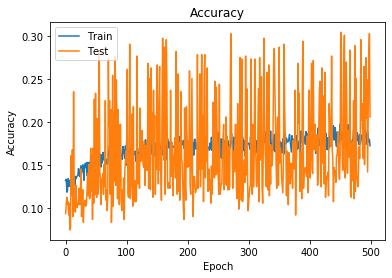

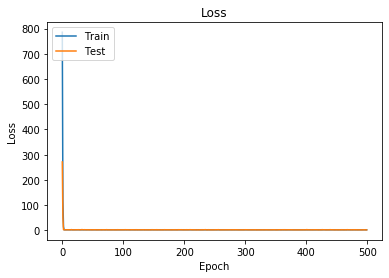

[[59 71  7  1  6 14  1  4]
 [ 1 51  3  0  0  0  1  0]
 [ 3 46  3  1  0  0  1  0]
 [ 9 45  6  0  0  5  1  0]
 [13 42  3  0  0  3  2  1]
 [12 37  6  1  1  4  2  0]
 [14 36  3  0  0  6  2  3]
 [ 8 32  3  0  1  4  1  0]]
Precision [0.49579832 0.14166667 0.08823529 0.         0.         0.11111111
 0.18181818 0.        ]


In [62]:
round_model = get_round_model(x_train.shape[1], len(df['Round'].unique()))
train_output = train_test_evaluate(round_model, x_train, x_test, y_train, y_test, num_epochs=500)

### Round model with PCA

In [24]:
from sklearn.decomposition import PCA

new_df = final_df.reset_index()


features = new_df.drop(['Round', 'Pick'], axis=1)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)
pca.explained_variance_ratio_

array([9.99997011e-01, 1.91427616e-06, 2.79282388e-07])

In [25]:
cols = [f"pc_{i+1}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(data=principal_components, columns=cols)
pca_df = pd.concat([pca_df, new_df['Round']], axis=1)

In [26]:
x_train, x_test, y_train, y_test = get_train_test_data(pca_df, 'Round', 0.15, True)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2743, 3), (579, 3), (2743, 8), (579, 8))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 264       
_________________________________________________________________
activation_13 (Activation)   (None, 8)                 0         
Total params: 2,312
Trainable params: 2,312
Non-trainable params: 0
_________________________________________________________________
None
Train on 2743 samples, validate on 579 samples
Epoch 1/1000
2743/2743 [==============================] - 0s 144us/sample - loss: 179.7084 - accuracy: 0.1152 - val_loss: 128.6770 - val_accuracy: 0.0950
Epoch 2/1000
2743/2743 [===================

2743/2743 [==============================] - 0s 40us/sample - loss: 2.2457 - accuracy: 0.1517 - val_loss: 2.0963 - val_accuracy: 0.1658
Epoch 50/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.2823 - accuracy: 0.1509 - val_loss: 2.0916 - val_accuracy: 0.1520
Epoch 51/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3427 - accuracy: 0.1498 - val_loss: 2.2710 - val_accuracy: 0.1796
Epoch 52/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2633 - accuracy: 0.1615 - val_loss: 2.1088 - val_accuracy: 0.2176
Epoch 53/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2786 - accuracy: 0.1637 - val_loss: 2.3834 - val_accuracy: 0.1261
Epoch 54/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2602 - accuracy: 0.1608 - val_loss: 2.5536 - val_accuracy: 0.0933
Epoch 55/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3320 - accuracy: 0.1506 - val_

Epoch 104/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.2552 - accuracy: 0.1728 - val_loss: 2.3925 - val_accuracy: 0.1589
Epoch 105/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.2888 - accuracy: 0.1644 - val_loss: 2.2670 - val_accuracy: 0.1330
Epoch 106/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.2044 - accuracy: 0.1633 - val_loss: 2.1568 - val_accuracy: 0.1554
Epoch 107/1000
2743/2743 [==============================] - 0s 43us/sample - loss: 2.2979 - accuracy: 0.1622 - val_loss: 2.5039 - val_accuracy: 0.1140
Epoch 108/1000
2743/2743 [==============================] - 0s 47us/sample - loss: 2.3182 - accuracy: 0.1593 - val_loss: 2.4795 - val_accuracy: 0.1226
Epoch 109/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.2886 - accuracy: 0.1611 - val_loss: 2.3318 - val_accuracy: 0.1123
Epoch 110/1000
2743/2743 [==============================] - 0s 35us/sample - loss: 2.2561 - ac

2743/2743 [==============================] - 0s 41us/sample - loss: 2.3399 - accuracy: 0.1786 - val_loss: 2.4927 - val_accuracy: 0.1295
Epoch 159/1000
2743/2743 [==============================] - 0s 44us/sample - loss: 2.3611 - accuracy: 0.1703 - val_loss: 2.3312 - val_accuracy: 0.1693
Epoch 160/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2636 - accuracy: 0.1641 - val_loss: 2.4652 - val_accuracy: 0.1123
Epoch 161/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.1924 - accuracy: 0.1885 - val_loss: 2.1320 - val_accuracy: 0.2021
Epoch 162/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.1948 - accuracy: 0.1746 - val_loss: 2.0743 - val_accuracy: 0.2314
Epoch 163/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2758 - accuracy: 0.1837 - val_loss: 2.1427 - val_accuracy: 0.2159
Epoch 164/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.2999 - accuracy: 0.1619 

2743/2743 [==============================] - 0s 39us/sample - loss: 2.2654 - accuracy: 0.1724 - val_loss: 2.1060 - val_accuracy: 0.1969
Epoch 213/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2339 - accuracy: 0.1743 - val_loss: 2.1584 - val_accuracy: 0.1883
Epoch 214/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2022 - accuracy: 0.1801 - val_loss: 2.4785 - val_accuracy: 0.1727
Epoch 215/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2406 - accuracy: 0.1764 - val_loss: 2.2037 - val_accuracy: 0.1606
Epoch 216/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2756 - accuracy: 0.1699 - val_loss: 2.3759 - val_accuracy: 0.1071
Epoch 217/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.1899 - accuracy: 0.1841 - val_loss: 2.0229 - val_accuracy: 0.2591
Epoch 218/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2019 - accuracy: 0.1874 

2743/2743 [==============================] - 0s 38us/sample - loss: 2.2884 - accuracy: 0.1743 - val_loss: 2.0406 - val_accuracy: 0.2090
Epoch 267/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2655 - accuracy: 0.1677 - val_loss: 2.0645 - val_accuracy: 0.2781
Epoch 268/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2787 - accuracy: 0.1713 - val_loss: 2.1254 - val_accuracy: 0.1796
Epoch 269/1000
2743/2743 [==============================] - 0s 42us/sample - loss: 2.2019 - accuracy: 0.2005 - val_loss: 2.3186 - val_accuracy: 0.1416
Epoch 270/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2316 - accuracy: 0.1816 - val_loss: 2.2300 - val_accuracy: 0.1364
Epoch 271/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.1773 - accuracy: 0.1878 - val_loss: 2.0094 - val_accuracy: 0.2418
Epoch 272/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.1617 - accuracy: 0.1867 

2743/2743 [==============================] - 0s 49us/sample - loss: 2.1363 - accuracy: 0.1874 - val_loss: 2.1231 - val_accuracy: 0.1537
Epoch 321/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2198 - accuracy: 0.1845 - val_loss: 2.2429 - val_accuracy: 0.1330
Epoch 322/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2017 - accuracy: 0.1801 - val_loss: 2.3916 - val_accuracy: 0.1313
Epoch 323/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2306 - accuracy: 0.1651 - val_loss: 2.0925 - val_accuracy: 0.1917
Epoch 324/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.2500 - accuracy: 0.1816 - val_loss: 2.6128 - val_accuracy: 0.1295
Epoch 325/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2482 - accuracy: 0.1878 - val_loss: 2.4126 - val_accuracy: 0.1036
Epoch 326/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2761 - accuracy: 0.1874 

2743/2743 [==============================] - 0s 45us/sample - loss: 2.1767 - accuracy: 0.1903 - val_loss: 2.5270 - val_accuracy: 0.1226
Epoch 375/1000
2743/2743 [==============================] - 0s 51us/sample - loss: 2.2372 - accuracy: 0.1699 - val_loss: 2.6863 - val_accuracy: 0.1140
Epoch 376/1000
2743/2743 [==============================] - 0s 55us/sample - loss: 2.1924 - accuracy: 0.1816 - val_loss: 2.2684 - val_accuracy: 0.1520
Epoch 377/1000
2743/2743 [==============================] - 0s 46us/sample - loss: 2.1622 - accuracy: 0.1874 - val_loss: 2.0979 - val_accuracy: 0.1658
Epoch 378/1000
2743/2743 [==============================] - 0s 47us/sample - loss: 2.2322 - accuracy: 0.1859 - val_loss: 2.3623 - val_accuracy: 0.1295
Epoch 379/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2540 - accuracy: 0.1772 - val_loss: 2.2865 - val_accuracy: 0.1485
Epoch 380/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2254 - accuracy: 0.1695 

2743/2743 [==============================] - 0s 42us/sample - loss: 2.1310 - accuracy: 0.1892 - val_loss: 2.1307 - val_accuracy: 0.1641
Epoch 429/1000
2743/2743 [==============================] - 0s 52us/sample - loss: 2.2124 - accuracy: 0.1772 - val_loss: 2.5532 - val_accuracy: 0.1503
Epoch 430/1000
2743/2743 [==============================] - 0s 63us/sample - loss: 2.3383 - accuracy: 0.1805 - val_loss: 2.0609 - val_accuracy: 0.2435
Epoch 431/1000
2743/2743 [==============================] - 0s 47us/sample - loss: 2.1910 - accuracy: 0.1856 - val_loss: 2.1512 - val_accuracy: 0.2694
Epoch 432/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.3406 - accuracy: 0.1695 - val_loss: 2.3951 - val_accuracy: 0.1503
Epoch 433/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.2498 - accuracy: 0.1812 - val_loss: 2.4659 - val_accuracy: 0.1071
Epoch 434/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.1932 - accuracy: 0.1830 

2743/2743 [==============================] - 0s 41us/sample - loss: 2.2724 - accuracy: 0.1918 - val_loss: 2.4474 - val_accuracy: 0.1313
Epoch 483/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.1770 - accuracy: 0.1921 - val_loss: 2.3412 - val_accuracy: 0.2556
Epoch 484/1000
2743/2743 [==============================] - 0s 62us/sample - loss: 2.2214 - accuracy: 0.1754 - val_loss: 2.0668 - val_accuracy: 0.2504
Epoch 485/1000
2743/2743 [==============================] - 0s 58us/sample - loss: 2.2523 - accuracy: 0.1863 - val_loss: 2.5224 - val_accuracy: 0.1088
Epoch 486/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.1872 - accuracy: 0.1841 - val_loss: 2.1725 - val_accuracy: 0.1554
Epoch 487/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.1699 - accuracy: 0.1925 - val_loss: 2.1521 - val_accuracy: 0.1779
Epoch 488/1000
2743/2743 [==============================] - 0s 43us/sample - loss: 2.1844 - accuracy: 0.1972 

2743/2743 [==============================] - 0s 39us/sample - loss: 2.1990 - accuracy: 0.1797 - val_loss: 2.0695 - val_accuracy: 0.1710
Epoch 537/1000
2743/2743 [==============================] - 0s 66us/sample - loss: 2.2493 - accuracy: 0.1830 - val_loss: 2.7324 - val_accuracy: 0.1244
Epoch 538/1000
2743/2743 [==============================] - 0s 55us/sample - loss: 2.2822 - accuracy: 0.1845 - val_loss: 2.0490 - val_accuracy: 0.2781
Epoch 539/1000
2743/2743 [==============================] - 0s 60us/sample - loss: 2.2361 - accuracy: 0.1878 - val_loss: 2.1440 - val_accuracy: 0.1710
Epoch 540/1000
2743/2743 [==============================] - 0s 57us/sample - loss: 2.2236 - accuracy: 0.1874 - val_loss: 2.4860 - val_accuracy: 0.1313
Epoch 541/1000
2743/2743 [==============================] - 0s 42us/sample - loss: 2.2163 - accuracy: 0.1907 - val_loss: 2.2477 - val_accuracy: 0.1330
Epoch 542/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.2804 - accuracy: 0.1845 

2743/2743 [==============================] - 0s 36us/sample - loss: 2.1849 - accuracy: 0.1819 - val_loss: 2.3293 - val_accuracy: 0.1382
Epoch 591/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.1614 - accuracy: 0.1826 - val_loss: 2.4152 - val_accuracy: 0.1313
Epoch 592/1000
2743/2743 [==============================] - 0s 35us/sample - loss: 2.1284 - accuracy: 0.1870 - val_loss: 2.1763 - val_accuracy: 0.1796
Epoch 593/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.1303 - accuracy: 0.1921 - val_loss: 2.3730 - val_accuracy: 0.1382
Epoch 594/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3358 - accuracy: 0.1794 - val_loss: 2.2376 - val_accuracy: 0.1934
Epoch 595/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2131 - accuracy: 0.1925 - val_loss: 2.0519 - val_accuracy: 0.1986
Epoch 596/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.1867 - accuracy: 0.1991 

2743/2743 [==============================] - 0s 44us/sample - loss: 2.1590 - accuracy: 0.1947 - val_loss: 2.6234 - val_accuracy: 0.1261
Epoch 645/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.1656 - accuracy: 0.1980 - val_loss: 2.2017 - val_accuracy: 0.1364
Epoch 646/1000
2743/2743 [==============================] - 0s 45us/sample - loss: 2.1131 - accuracy: 0.1921 - val_loss: 2.2515 - val_accuracy: 0.1485
Epoch 647/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.2799 - accuracy: 0.1808 - val_loss: 2.2589 - val_accuracy: 0.1883
Epoch 648/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.2816 - accuracy: 0.1888 - val_loss: 2.3944 - val_accuracy: 0.1554
Epoch 649/1000
2743/2743 [==============================] - 0s 43us/sample - loss: 2.3095 - accuracy: 0.1907 - val_loss: 2.4472 - val_accuracy: 0.1192
Epoch 650/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.3178 - accuracy: 0.1808 

2743/2743 [==============================] - 0s 40us/sample - loss: 2.1457 - accuracy: 0.1943 - val_loss: 1.9575 - val_accuracy: 0.2694
Epoch 699/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.2209 - accuracy: 0.1987 - val_loss: 2.1946 - val_accuracy: 0.1675
Epoch 700/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.1730 - accuracy: 0.1932 - val_loss: 2.2017 - val_accuracy: 0.1416
Epoch 701/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.2419 - accuracy: 0.1856 - val_loss: 2.2542 - val_accuracy: 0.1865
Epoch 702/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2893 - accuracy: 0.1837 - val_loss: 2.2181 - val_accuracy: 0.2366
Epoch 703/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.2298 - accuracy: 0.1907 - val_loss: 2.2000 - val_accuracy: 0.2591
Epoch 704/1000
2743/2743 [==============================] - 0s 46us/sample - loss: 2.1838 - accuracy: 0.1772 

2743/2743 [==============================] - 0s 54us/sample - loss: 2.2283 - accuracy: 0.1834 - val_loss: 2.0715 - val_accuracy: 0.1969
Epoch 753/1000
2743/2743 [==============================] - 0s 52us/sample - loss: 2.2858 - accuracy: 0.1885 - val_loss: 2.5638 - val_accuracy: 0.1140
Epoch 754/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.3036 - accuracy: 0.1892 - val_loss: 2.2951 - val_accuracy: 0.1969
Epoch 755/1000
2743/2743 [==============================] - 0s 44us/sample - loss: 2.2388 - accuracy: 0.1863 - val_loss: 2.0280 - val_accuracy: 0.2539
Epoch 756/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.1251 - accuracy: 0.1961 - val_loss: 2.3808 - val_accuracy: 0.1554
Epoch 757/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.1711 - accuracy: 0.1874 - val_loss: 2.0180 - val_accuracy: 0.2349
Epoch 758/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2363 - accuracy: 0.1903 

2743/2743 [==============================] - 0s 37us/sample - loss: 2.1932 - accuracy: 0.1939 - val_loss: 2.0196 - val_accuracy: 0.2142
Epoch 807/1000
2743/2743 [==============================] - 0s 40us/sample - loss: 2.2699 - accuracy: 0.1805 - val_loss: 2.5570 - val_accuracy: 0.1278
Epoch 808/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.1617 - accuracy: 0.1878 - val_loss: 2.4495 - val_accuracy: 0.1226
Epoch 809/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.1969 - accuracy: 0.1939 - val_loss: 2.2913 - val_accuracy: 0.2003
Epoch 810/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2630 - accuracy: 0.1939 - val_loss: 2.4713 - val_accuracy: 0.1485
Epoch 811/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.1786 - accuracy: 0.1914 - val_loss: 2.1279 - val_accuracy: 0.2280
Epoch 812/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2181 - accuracy: 0.1939 

2743/2743 [==============================] - 0s 38us/sample - loss: 2.2007 - accuracy: 0.1790 - val_loss: 2.2658 - val_accuracy: 0.1658
Epoch 861/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.1874 - accuracy: 0.1925 - val_loss: 2.6553 - val_accuracy: 0.1364
Epoch 862/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.1949 - accuracy: 0.1812 - val_loss: 2.1508 - val_accuracy: 0.2055
Epoch 863/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2399 - accuracy: 0.1794 - val_loss: 2.0616 - val_accuracy: 0.2073
Epoch 864/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2289 - accuracy: 0.1786 - val_loss: 2.2997 - val_accuracy: 0.1054
Epoch 865/1000
2743/2743 [==============================] - 0s 58us/sample - loss: 2.1908 - accuracy: 0.1914 - val_loss: 2.0645 - val_accuracy: 0.1744
Epoch 866/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.2142 - accuracy: 0.1914 

2743/2743 [==============================] - 0s 40us/sample - loss: 2.3501 - accuracy: 0.1739 - val_loss: 2.0172 - val_accuracy: 0.2349
Epoch 915/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.1594 - accuracy: 0.1885 - val_loss: 2.6750 - val_accuracy: 0.1416
Epoch 916/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2261 - accuracy: 0.1910 - val_loss: 2.4837 - val_accuracy: 0.1520
Epoch 917/1000
2743/2743 [==============================] - 0s 42us/sample - loss: 2.1943 - accuracy: 0.1892 - val_loss: 2.1134 - val_accuracy: 0.2021
Epoch 918/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.2534 - accuracy: 0.1845 - val_loss: 2.1553 - val_accuracy: 0.2677
Epoch 919/1000
2743/2743 [==============================] - 0s 37us/sample - loss: 2.1632 - accuracy: 0.1936 - val_loss: 2.2380 - val_accuracy: 0.2176
Epoch 920/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.2132 - accuracy: 0.1958 

2743/2743 [==============================] - 0s 70us/sample - loss: 2.2713 - accuracy: 0.1939 - val_loss: 2.3862 - val_accuracy: 0.1192
Epoch 969/1000
2743/2743 [==============================] - 0s 41us/sample - loss: 2.2395 - accuracy: 0.1885 - val_loss: 2.4667 - val_accuracy: 0.1209
Epoch 970/1000
2743/2743 [==============================] - 0s 39us/sample - loss: 2.1528 - accuracy: 0.2020 - val_loss: 2.0698 - val_accuracy: 0.2953
Epoch 971/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.2378 - accuracy: 0.1907 - val_loss: 2.3369 - val_accuracy: 0.1779
Epoch 972/1000
2743/2743 [==============================] - 0s 36us/sample - loss: 2.1482 - accuracy: 0.1969 - val_loss: 2.2296 - val_accuracy: 0.2625
Epoch 973/1000
2743/2743 [==============================] - 0s 38us/sample - loss: 2.1870 - accuracy: 0.2009 - val_loss: 2.3663 - val_accuracy: 0.1416
Epoch 974/1000
2743/2743 [==============================] - 0s 42us/sample - loss: 2.1336 - accuracy: 0.1918 

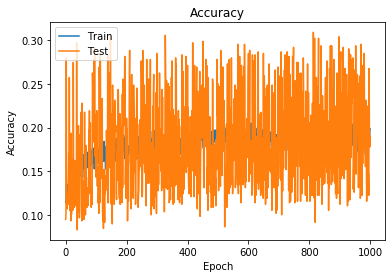

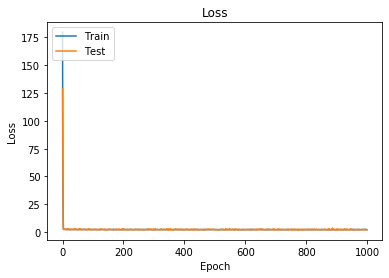

[[61  0 49  1 25 25  0  2]
 [ 3  0 42  2  6  3  0  0]
 [ 7  0 33  3  6  5  0  0]
 [ 8  0 46  0  5  6  0  1]
 [14  0 35  0  8  7  0  0]
 [10  0 29  3 13  8  0  0]
 [14  0 20  2 16 10  0  2]
 [11  0 24  0  4 10  0  0]]
Precision [0.4765625  0.         0.11870504 0.         0.09638554 0.10810811
 0.         0.        ]


/Users/ryansedlacek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
round_model = get_round_model(x_train.shape[1], len(df['Round'].unique()))
train_output = train_test_evaluate(round_model, x_train, x_test, y_train, y_test, num_epochs=1000)

## The pick model



In [28]:
def get_pick_model(input_size, output_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=[input_size], kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(1, activation='linear', kernel_initializer='normal'),
    ])

    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  metrics=['mse', 'mae'])
    print(model.summary())
    return model

In [29]:
def train_test_evaluate_regression(model, x_train, x_test, y_train, y_test, num_epochs=500):
    train_output = model.fit(
        x_train,
        y_train,
        epochs=num_epochs,
        validation_data=(x_test, y_test),
        batch_size=32
    )
    make_plot(train_output.history["mse"], train_output.history["val_mse"], "MSE")
    make_plot(train_output.history["mae"], train_output.history["val_mae"], "MAE")
    return train_output

In [30]:
pick_df = final_df
x_train, x_test, y_train, y_test = get_train_test_data(pick_df, 'Pick', 0.1, True, 4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2560, 31), (386, 31), (2560,), (386,))

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 16)                496       
_________________________________________________________________
dense_265 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
None
Train on 2560 samples, validate on 386 samples
Epoch 1/250
2560/2560 [==============================] - 0s 186us/sample - loss: 6583.1467 - mse: 6583.1460 - mae: 66.2215 - val_loss: 7454.7067 - val_mse: 7454.7070 - val_mae: 76.4892
Epoch 2/250
2560/2560 [==============================] - 0s 45us/sample - loss: 4985.9748 - mse: 4985.9751 - mae: 60.0820 - val_loss: 7371.4214 - va

2560/2560 [==============================] - 0s 38us/sample - loss: 4973.7693 - mse: 4973.7686 - mae: 59.9880 - val_loss: 7335.2132 - val_mse: 7335.2129 - val_mae: 75.9092
Epoch 42/250
2560/2560 [==============================] - 0s 41us/sample - loss: 4962.9254 - mse: 4962.9258 - mae: 59.9519 - val_loss: 7555.8297 - val_mse: 7555.8296 - val_mae: 76.9183
Epoch 43/250
2560/2560 [==============================] - 0s 37us/sample - loss: 4969.7427 - mse: 4969.7427 - mae: 60.0830 - val_loss: 7275.3843 - val_mse: 7275.3848 - val_mae: 75.6362
Epoch 44/250
2560/2560 [==============================] - 0s 32us/sample - loss: 4969.3812 - mse: 4969.3818 - mae: 59.9503 - val_loss: 7110.8209 - val_mse: 7110.8208 - val_mae: 74.8592
Epoch 45/250
2560/2560 [==============================] - 0s 32us/sample - loss: 4974.3879 - mse: 4974.3877 - mae: 59.9666 - val_loss: 7524.4881 - val_mse: 7524.4883 - val_mae: 76.7722
Epoch 46/250
2560/2560 [==============================] - 0s 36us/sample - loss: 4954.53

2560/2560 [==============================] - 0s 32us/sample - loss: 4857.0289 - mse: 4857.0288 - mae: 59.2341 - val_loss: 7374.0763 - val_mse: 7374.0771 - val_mae: 75.8445
Epoch 130/250
2560/2560 [==============================] - 0s 36us/sample - loss: 4849.2097 - mse: 4849.2100 - mae: 59.1621 - val_loss: 7771.8340 - val_mse: 7771.8335 - val_mae: 77.5935
Epoch 131/250
2560/2560 [==============================] - 0s 48us/sample - loss: 4848.9602 - mse: 4848.9595 - mae: 59.2189 - val_loss: 7500.6318 - val_mse: 7500.6323 - val_mae: 76.3980
Epoch 132/250
2560/2560 [==============================] - 0s 43us/sample - loss: 4855.1036 - mse: 4855.1025 - mae: 59.2472 - val_loss: 7523.5266 - val_mse: 7523.5264 - val_mae: 76.4943
Epoch 133/250
2560/2560 [==============================] - 0s 33us/sample - loss: 4834.1992 - mse: 4834.1982 - mae: 59.1373 - val_loss: 7304.7873 - val_mse: 7304.7871 - val_mae: 75.5067
Epoch 134/250
2560/2560 [==============================] - 0s 33us/sample - loss: 48

2560/2560 [==============================] - 0s 32us/sample - loss: 4634.1286 - mse: 4634.1289 - mae: 57.1752 - val_loss: 8079.7734 - val_mse: 8079.7734 - val_mae: 77.6703
Epoch 218/250
2560/2560 [==============================] - 0s 34us/sample - loss: 4593.9470 - mse: 4593.9463 - mae: 56.9516 - val_loss: 8544.7872 - val_mse: 8544.7871 - val_mae: 79.3537
Epoch 219/250
2560/2560 [==============================] - 0s 37us/sample - loss: 4609.5794 - mse: 4609.5796 - mae: 57.1902 - val_loss: 7860.9788 - val_mse: 7860.9795 - val_mae: 76.8139
Epoch 220/250
2560/2560 [==============================] - 0s 32us/sample - loss: 4615.1475 - mse: 4615.1475 - mae: 57.1857 - val_loss: 7922.3794 - val_mse: 7922.3804 - val_mae: 77.0532
Epoch 221/250
2560/2560 [==============================] - 0s 32us/sample - loss: 4611.0289 - mse: 4611.0283 - mae: 57.1790 - val_loss: 7512.9044 - val_mse: 7512.9048 - val_mae: 75.3744
Epoch 222/250
2560/2560 [==============================] - 0s 31us/sample - loss: 46

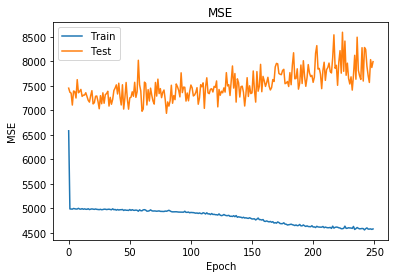

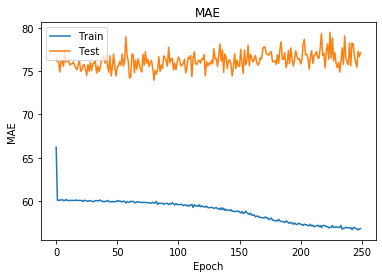

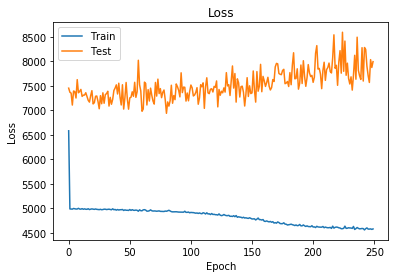

In [517]:
pick_df = final_df.drop('Round', axis=1)
x_train, x_test, y_train, y_test = get_train_test_data(pick_df, 'Pick', 0.1, True, 4)
pick_model = get_pick_model(x_train.shape[1], len(final_df['Pick'].unique()))
train_output = train_test_evaluate_regression(pick_model, x_train, x_test, y_train, y_test, num_epochs=250)